<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None


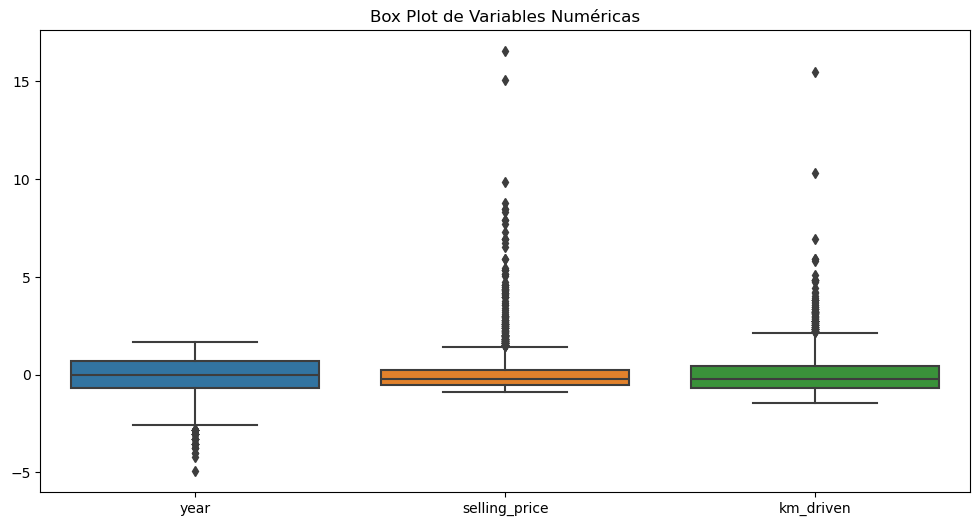

<Figure size 1200x600 with 0 Axes>

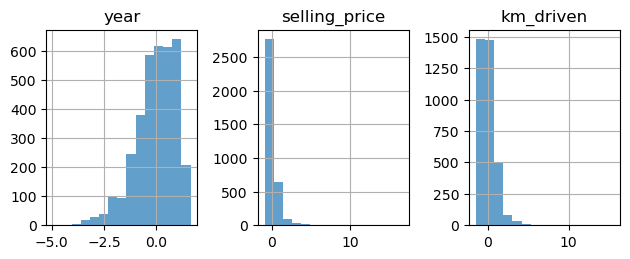

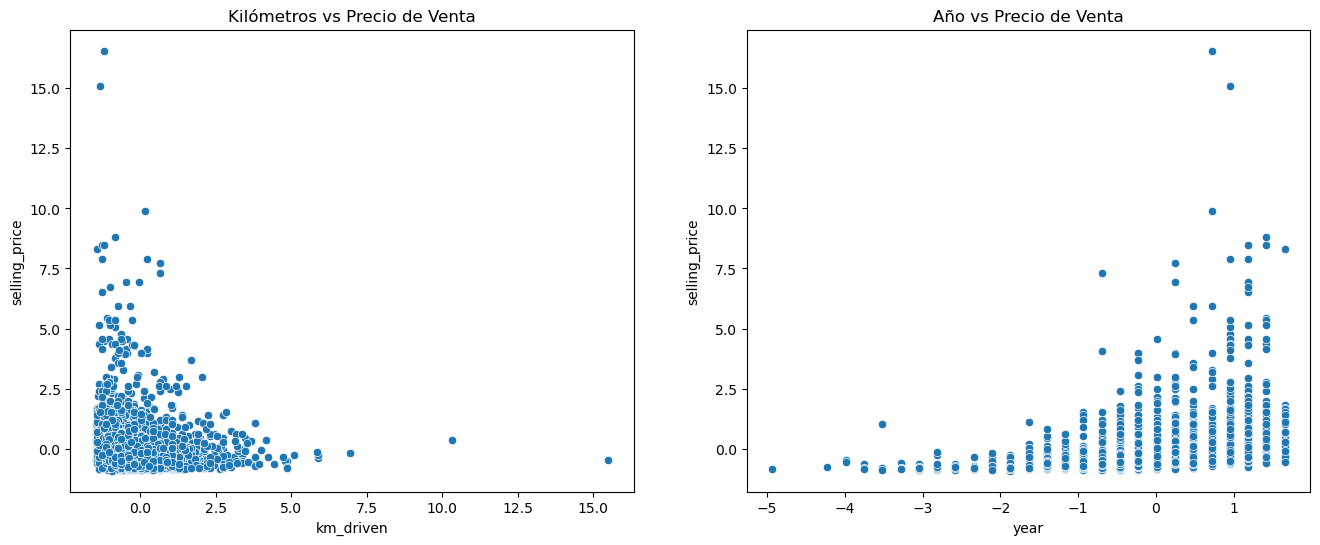

                       name      year  selling_price  km_driven  fuel_Diesel  \
0             Maruti 800 AC -1.402566      -0.812819   0.015754        False   
1  Maruti Wagon R LXI Minor -1.402566      -0.665538  -0.404650        False   
2      Hyundai Verna 1.6 SX -0.226418       0.247604   0.646360         True   
3    Datsun RediGO T Option  0.949731      -0.439708  -0.488731        False   
4     Honda Amaze VX i-DTEC  0.244042      -0.046958   1.508188         True   

   fuel_Electric  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0          False     False         True                    True   
1          False     False         True                    True   
2          False     False        False                    True   
3          False     False         True                    True   
4          False     False        False                    True   

   seller_type_Trustmark Dealer  transmission_Manual  \
0                         False                 True   
1   

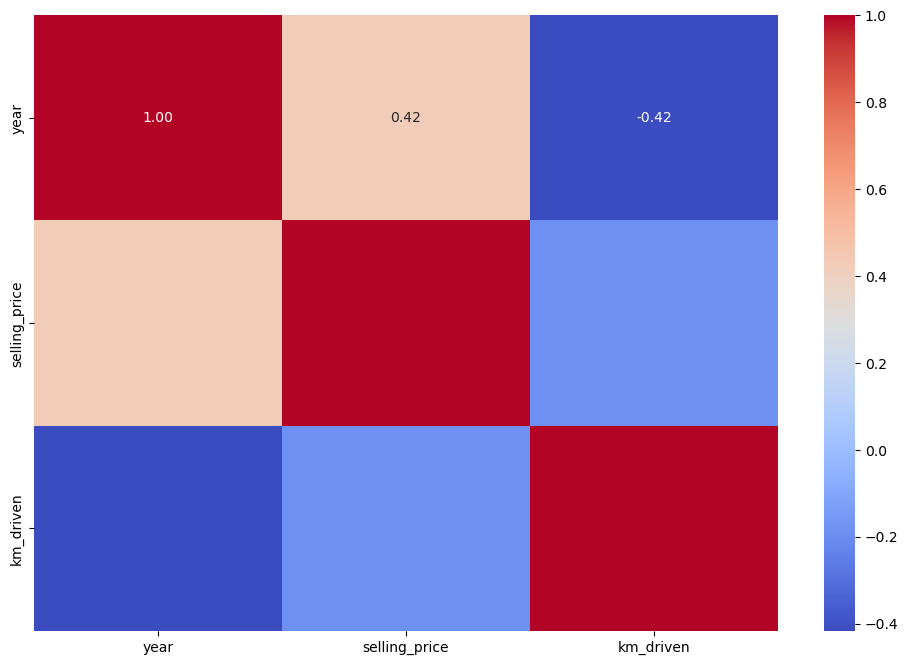

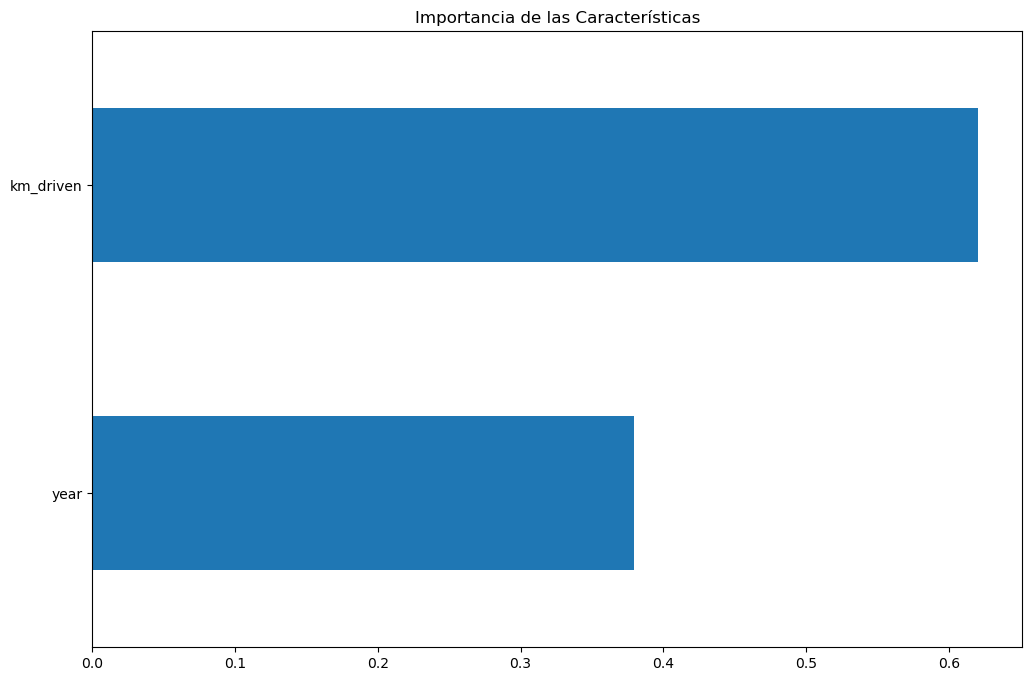

Error Medio Cuadrático: 1.046696595178904
Error Medio Cuadrático Raíz: 1.0230819102979507
Error Medio Absoluto: 0.45997579362501806
Coeficiente de Determinación: 0.1574142203736849


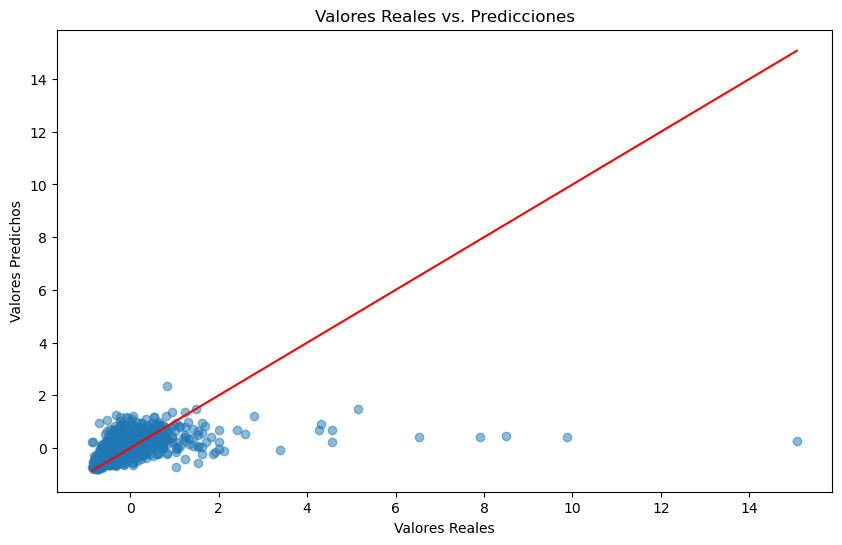

C:\Users\Otro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


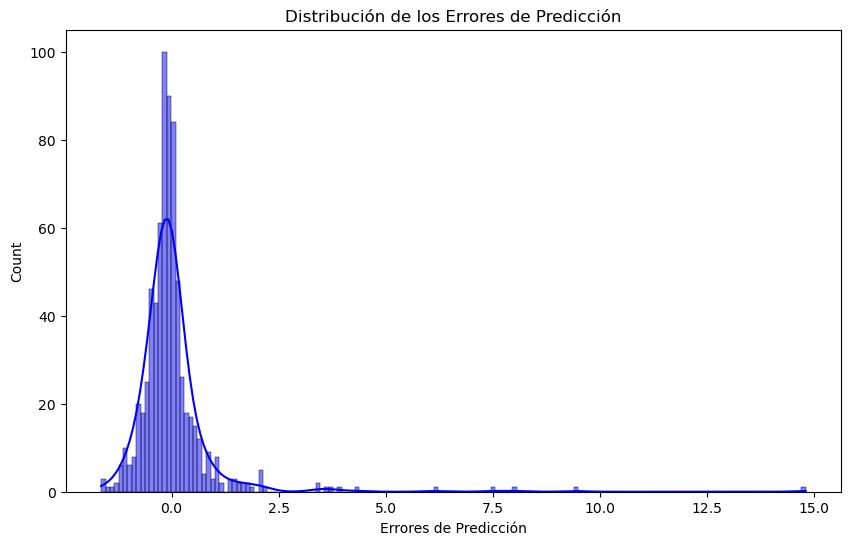

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Cargar los datos desde la ruta especificada
datos = pd.read_csv("C:\\Users\\Otro\\Desktop\\CAR DETAILS FROM CAR DEKHO.csv")

# Mostrar información inicial para entender los datos
print(datos.info())

# Tratar con valores faltantes
# Calcular la media solo para columnas numéricas
columnas_numericas = datos.select_dtypes(include=[np.number]).columns
datos[columnas_numericas] = datos[columnas_numericas].fillna(datos[columnas_numericas].mean())

# Reemplazar valores faltantes en columnas categóricas con la moda
columnas_categoricas = datos.select_dtypes(include=['object']).columns
for columna in columnas_categoricas:
    datos[columna] = datos[columna].fillna(datos[columna].mode()[0])

# Eliminar duplicados
datos.drop_duplicates(inplace=True)

# Codificación de variables categóricas usando One-Hot Encoding
datos = pd.get_dummies(datos, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Escalado de características numéricas
escalador = StandardScaler()
datos[columnas_numericas] = escalador.fit_transform(datos[columnas_numericas])

# Box plots para detectar valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(data=datos[columnas_numericas])
plt.title("Box Plot de Variables Numéricas")
plt.show()

# Histogramas para examinar distribuciones
plt.figure(figsize=(12, 6))
datos[columnas_numericas].hist(bins=15, layout=(2,3), alpha=0.7)
plt.tight_layout()
plt.show()

# Scatter plots para visualizar relaciones entre variables y precio de venta
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(data=datos, x='km_driven', y='selling_price', ax=ax[0])
ax[0].set_title('Kilómetros vs Precio de Venta')
sns.scatterplot(data=datos, x='year', y='selling_price', ax=ax[1])
ax[1].set_title('Año vs Precio de Venta')
plt.show()


# Verificación final de los datos preparados
print(datos.head())
print(datos.describe())
print(datos.info())

# Asegurarse de que solo columnas numéricas están incluidas para la correlación
datos_numericos = datos.select_dtypes(include=[np.number])

# Análisis de correlación
matriz_correlacion = datos_numericos.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Visualización de la importancia de las características usando Random Forest
X = datos_numericos.drop('selling_price', axis=1)
y = datos_numericos['selling_price']
modelo = RandomForestRegressor()
modelo.fit(X, y)
importancias = pd.Series(modelo.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 8))
importancias.sort_values().plot(kind='barh')
plt.title('Importancia de las Características')
plt.show()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar los hiperparámetros del modelo
modelo = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=4, random_state=42)

# Entrenar el modelo
modelo.fit(X_entrenamiento, y_entrenamiento)

# Predecir los resultados para el conjunto de prueba
y_prediccion = modelo.predict(X_prueba)

# Evaluar el modelo
error_medio_cuadratico = mean_squared_error(y_prueba, y_prediccion)
error_medio_cuadratico_raiz = mean_squared_error(y_prueba, y_prediccion, squared=False)
error_medio_absoluto = mean_absolute_error(y_prueba, y_prediccion)
coeficiente_determinacion = r2_score(y_prueba, y_prediccion)

print(f"Error Medio Cuadrático: {error_medio_cuadratico}")
print(f"Error Medio Cuadrático Raíz: {error_medio_cuadratico_raiz}")
print(f"Error Medio Absoluto: {error_medio_absoluto}")
print(f"Coeficiente de Determinación: {coeficiente_determinacion}")

# Visualización de los resultados
# Comparación de valores reales con valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_prueba, y_prediccion, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs. Predicciones")
plt.plot([min(y_prueba), max(y_prueba)], [min(y_prueba), max(y_prueba)], color='red')  # Línea de perfecta predicción
plt.show()

# Histograma de los errores de predicción
errores = y_prueba - y_prediccion
plt.figure(figsize=(10, 6))
sns.histplot(errores, kde=True, color='blue')
plt.xlabel("Errores de Predicción")
plt.title("Distribución de los Errores de Predicción")
plt.show()
